In [188]:
#Importamos las librerías que vamos a utilizar
import pandas as pd
import ast
import gzip

#Comenzamos analizando el archivo de stream_games
stream_games = pd.read_json('C:\\Users\\licle\\Desktop\\Prep Henry\\Proyecto Integrados n1\\PI MLOps - STEAM\\output_steam_games.json', lines=True)

#Notamos en el EDA que hay muchas filas vacías por lo tanto hacemos una copia del archivo original: 
copia_stream_games = stream_games.copy()
#Luego eliminamos aquellas filas que estén integramente vacías dado a que no tiene absolutamente nada de información
copia_stream_games.dropna(inplace = True , how='all')
#Trabajamos con una copia por cualquier inconveniente
copia_stream_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None


In [189]:
# Tratar los valores no finitos en la columna 'id'
copia_stream_games['id'] = copia_stream_games['id'].fillna(0)  # Rellenar los valores faltantes con 0
# Convertir la columna 'id' de float a entero
copia_stream_games['id'] = copia_stream_games['id'].astype(int)
# Convertir la columna 'release_date' a tipo datetime si no está en ese formato
copia_stream_games['release_date'] = pd.to_datetime(copia_stream_games['release_date'], errors='coerce')
copia_stream_games['app_name'] = copia_stream_games['app_name'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
copia_stream_games['title'] = copia_stream_games['title'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()

In [190]:
#Tenemos algunas columnas que dado el objetivo que nos proponen, entendemos que si bien pueden aportar
#información válida para análisis con otra impronta, no concluyen pertinente para nuestro trabajo.
#Por lo cual, dichas columnas que son: 'tags', 'price', 'early_access', 'reviews_url','developer', 'specs', 'publisher', 'url'
#Van a ser removidas con la finalidad de tener mejor acceso a la información y ocupar menos de memoria de procesamiento.
#En caso de ser necesario contamos con la variable con el archivo original.
copia_stream_games.drop(columns=['tags', 'price', 'early_access', 'reviews_url','developer', 'specs', 'publisher', 'url'], inplace= True) 

In [192]:
copia_stream_games.head()

,genres,app_name,title,release_date,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",lost summoner kitty,lost summoner kitty,2018-01-04,761140
88311,"[Free to Play, Indie, RPG, Strategy]",ironbound,ironbound,2018-01-04,643980
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",real pool 3d - poolians,real pool 3d - poolians,2017-07-24,670290
88313,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,767400
88314,None,log challenge,None,NaT,773570


In [191]:
#Exportamos nuestro data set limpio y transformado:
copia_stream_games.to_parquet('C:\\Users\\licle\\Desktop\\Prep Henry\\Proyecto Integrados n1\\PI MLOps - STEAM\\Datasets\\steam_games.parquet')

In [9]:
#II) ITEMS

#Al ser un archivo pesado y con mucho contenido, vamos utilizar la biblioteca zip para trabajar directamente
#con el archivo comprimido. Luego declaramos una lista con los datos que vamos a guardar
#con la iteración for uno a uno los datos para evitar errores y fidelidad de la data.
datos = []
with gzip.open('users_items.json.gz', 'rb') as f:
    for line in f:
        datos.append(ast.literal_eval(line.decode('utf-8')))
users_items = pd.DataFrame(datos)
f.close()

In [10]:
# Desanidar la columna 'items' y normalizar los datos en un sólo dataframe llamado 'items_def'
items_def = pd.json_normalize(users_items.to_dict('records'), 'items', ['user_id'])

In [11]:
items_def.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479


In [12]:
items_def['playtime_forever'] = items_def['playtime_forever'].fillna(0)  # Rellenar los valores faltantes con 0
items_def['playtime_forever'] = items_def['playtime_forever'].astype(float) #convertir los datos a enteros
items_def['playtime_2weeks'] = items_def['playtime_2weeks'].fillna(0)  # Rellenar los valores faltantes con 0
items_def['playtime_2weeks'] = items_def['playtime_2weeks'].astype(int) #convertir los datos a enteros
items_def['item_id'] = items_def['item_id'].fillna(0)
items_def['item_id'] = items_def['item_id'].astype(int)
#Normalizar los datos strings de la columna 'item_name' en cadenas de texto en minúsculas, remplazo de carácteres especiales y sin espacios en blanco
items_def['item_name'] = items_def['item_name'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
#Colocamos 'user_id' para tener la primera columna como referencia
items_def = items_def[['user_id', 'item_id', 'item_name', 'playtime_forever', 'playtime_2weeks']]
items_def.head()

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,counter-strike,6.0,0
1,76561197970982479,20,team fortress classic,0.0,0
2,76561197970982479,30,day of defeat,7.0,0
3,76561197970982479,40,deathmatch classic,0.0,0
4,76561197970982479,50,half-life: opposing force,0.0,0


In [13]:
items_def.shape

(5153209, 5)

In [14]:
#Revisamos que la columna 'playtime_2weeks' tiene 50147707 datos igual a 0. Así que descartamos esta columna
#no se puede sumar horas jugadas a partir de esta columna
items_def['playtime_2weeks'].value_counts()
#Borramos columna 'playtime_2weeks'
items_def.drop(columns = 'playtime_2weeks', inplace=True)

In [15]:
#utilizaremos la columna 'playtime_forever' para calcular las horas jugadas en total
items_def['playtime_forever'].value_counts()

playtime_forever
0.0         1867963
1.0          102730
2.0           34770
3.0           31905
4.0           29438
             ...   
44704.0           1
22268.0           1
42856.0           1
217085.0          1
34753.0           1
Name: count, Length: 48861, dtype: int64

In [16]:
# Filtrar los valores distintos de 0
items_sin_ceros = items_def[items_def['playtime_forever'] != 0].copy()
items_sin_ceros.shape

(3285246, 4)

In [17]:
#Detectando Outliers
items_sin_ceros.sort_values(by='playtime_forever', ascending=False)

,user_id,item_id,item_name,playtime_forever
587715,wolop,4000,garry's mod,642773.0
2499068,Evilutional,212200,mabinogi,635295.0
4075729,76561198019826668,42710,call of duty: black ops - multiplayer,632452.0
1495340,76561198039832932,4000,garry's mod,613411.0
1836985,tsunamitad,72200,universe sandbox,600068.0
...,...,...,...,...
1361289,76561198074430595,268750,magicite,1.0
1361291,76561198074430595,302830,blockade 3d,1.0
1361298,76561198074430595,384150,terablaster,1.0
3798561,76561198015050660,282900,hyperdimension neptunia re;birth1,1.0


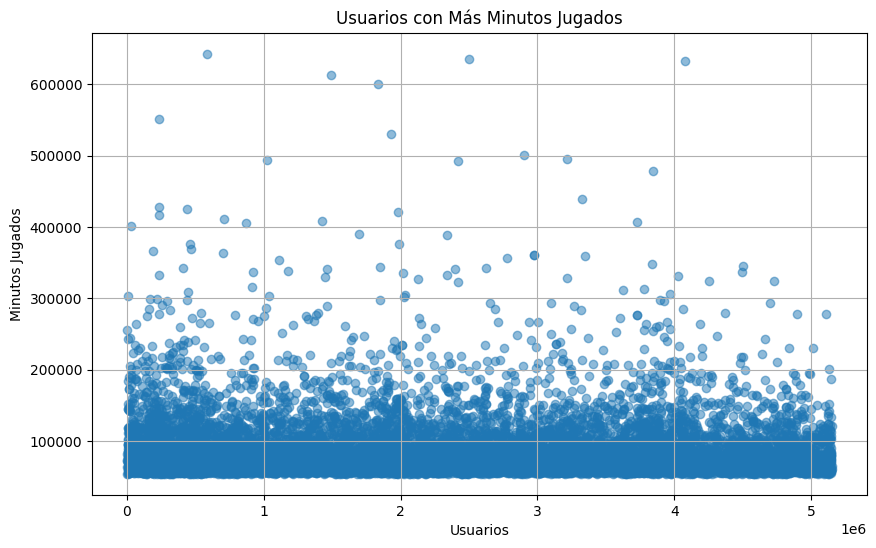

In [18]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por minutos jugados
df_sorted = items_sin_ceros.sort_values(by='playtime_forever', ascending=False)

# Seleccionar los usuarios con más minutos jugados
top_users = df_sorted.head(10000)  # Puedes ajustar el número según necesites

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_users.index, top_users['playtime_forever'], alpha=0.5)
plt.title('Usuarios con Más Minutos Jugados')
plt.xlabel('Usuarios')
plt.ylabel('Minutos Jugados')
plt.grid(True)
plt.show()

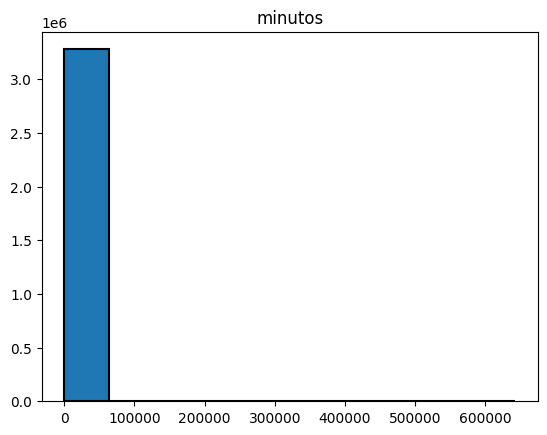

In [19]:
plt.title('minutos')
plt.hist(items_sin_ceros['playtime_forever'], edgecolor = 'black', linewidth = 1.5)
plt.show()

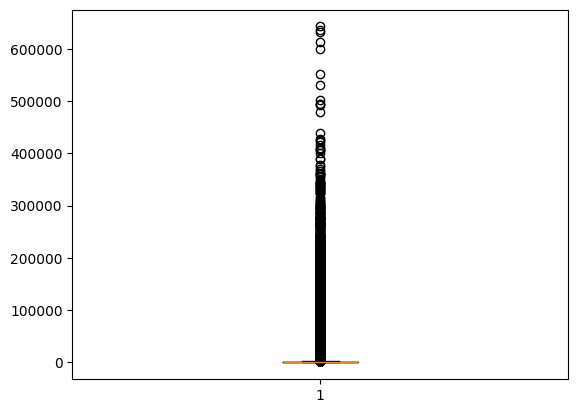

In [20]:
plt.boxplot(items_sin_ceros['playtime_forever'])
plt.show()

In [21]:
items_sin_ceros['playtime_forever'].describe()

count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

In [22]:
print(items_sin_ceros['playtime_forever'].min())
print(items_sin_ceros['playtime_forever'].max())
print(items_sin_ceros['playtime_forever'].mean())
print(items_sin_ceros['playtime_forever'].std())
print(items_sin_ceros['playtime_forever'].count())

1.0
642773.0
1555.2508649276187
6721.031811637286
3285246


In [ ]:
#Chequeamos los valores, mínimo, máximo, media, standar y contamos la cantidad total de valores
#La decisión que tomamos es que vamos a trabajar con cuartiles tratando de adaptarlo a la desviación

In [23]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = items_sin_ceros['playtime_forever'].quantile(0.10)
print(Q1)
Q3 = items_sin_ceros['playtime_forever'].quantile(0.90)
print(Q3)
# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers utilizando el método de Tukey
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers según el método de Tukey
items_filtered_outliers = items_sin_ceros[(items_sin_ceros['playtime_forever'] >= lower_limit) & (items_sin_ceros['playtime_forever'] <= upper_limit)]
print(lower_limit , upper_limit)

10.0
2774.0
-4136.0 6920.0


In [24]:
items_filtered_outliers.sort_values(by='playtime_forever', ascending = False)

,user_id,item_id,item_name,playtime_forever
595558,76561198028330335,42690,call of duty: modern warfare 3 - multiplayer,6920.0
3080187,76561198043723331,10190,call of duty: modern warfare 2 - multiplayer,6920.0
1741367,76561198091887085,4000,garry's mod,6920.0
1578687,76561198068565388,221100,dayz,6920.0
1686312,tsunamaki,304930,unturned,6920.0
...,...,...,...,...
3287874,Oliversask,205790,dota 2 test,1.0
3287861,Oliversask,219540,arma 2: operation arrowhead beta (obsolete),1.0
4077309,76561198020097543,386360,smite,1.0
5033657,76561198092297803,238260,pinball arcade,1.0


In [25]:
#Exportamos nuestro data set limpio y transformado:
items_filtered_outliers.to_parquet('C:\\Users\\licle\\Desktop\\Prep Henry\\Proyecto Integrados n1\\PI MLOps - STEAM\\Datasets\\users_items.parquet')

In [167]:
#III) Reviews:

reviews = []
with open('C:\\Users\\licle\\Desktop\\Prep Henry\\Proyecto Integrados n1\\PI MLOps - STEAM\\australian_user_reviews.json', 'rb') as f:
    for line in f:
        reviews.append(ast.literal_eval(line.decode('utf-8')))
user_reviews = pd.DataFrame(reviews)
f.close()

In [168]:
# Desanidar la columna 'items' y normalizar los datos en un sólo dataframe llamado 'items_def'
reviews_def = pd.json_normalize(user_reviews.to_dict('records'), 'reviews', ['user_id'])

In [169]:
reviews_def.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [170]:
#Organizamos los datos en función del 'user_id' y limpiamos las columnas que no utilizaremos, lo guardamos en el DataFrame que veniamos trabajando:
reviews_def = reviews_def[['user_id', 'item_id', 'recommend', 'review']]
reviews_def.head()

,user_id,item_id,recommend,review
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200,True,It's unique and worth a playthrough.
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610,True,I know what you think when you see this title ...
4,js41637,227300,True,For a simple (it's actually not all that simpl...


In [112]:
'''Feature Engineering: En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. 
Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: 
debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar 
la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. 
De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.'''

"Feature Engineering: En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. \nDebes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: \ndebe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar \nla de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. \nDe no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1."

In [172]:
#En este momento de ETL vamos a realizar los siguientes códigos para agregar una columna llamada 'sentiment_analysis'
#Todos los comentarios a minusculas y llenamos las reseñas vacias con 'neutral review'
prueba = reviews_def.copy()
lista_prueba = list(prueba['review'])

for i in range(len(lista_prueba)):
    lista_prueba[i] = lista_prueba[i].lstrip()
    if lista_prueba[i] == '' or lista_prueba[i] == ' ' or lista_prueba[i] == '  ':
        lista_prueba[i] = 'neutral review'
    lista_prueba[i] = lista_prueba[i].lower()

In [173]:
reviews_def['review'] = lista_prueba

In [174]:
reviews_def.head()

,user_id,item_id,recommend,review
0,76561197970982479,1250,True,simple yet with great replayability. in my opi...
1,76561197970982479,22200,True,it's unique and worth a playthrough.
2,76561197970982479,43110,True,great atmosphere. the gunplay can be a bit chu...
3,js41637,251610,True,i know what you think when you see this title ...
4,js41637,227300,True,for a simple (it's actually not all that simpl...


In [184]:
#Utilizamos textblob que es una librería para lenguaje natural común para facilitar el análisis de los comentarios
import nltk
from textblob import TextBlob

# Descargar recursos necesarios para NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

def sentiment_analysis(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity < 0:
            return 0  # es malo
        elif polarity == 0:
            return 1  # es neutro
        else:
            return 2  # es positivo
    else:
        return 1  # Valor por defecto si no hay texto

# Aplicar análisis de sentimiento a la columna 'review'
reviews_def['sentiment_analysis'] = reviews_def['review'].apply(sentiment_analysis)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\licle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\licle\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\licle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\licle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [186]:
#Borramos la columna review y chequeamos como quedo:
reviews_def.drop(columns=['review'], inplace=True)
reviews_def.head()


,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,0


In [187]:
#Guardamos en archivo formato parquet y pasamos a la siguiente etapa
reviews_def.to_parquet('C:\\Users\\licle\\Desktop\\Prep Henry\\Proyecto Integrados n1\\PI MLOps - STEAM\\Datasets\\user_reviews.parquet')